# Keras Classification

<span class="girk">We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.</span>

---
---

## Import  libraries & data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


## Exploratory Data Analysis and Visualization

In [25]:
!pip install pandasgui 

In [57]:
from pandasgui import show

gui = show(df)  # bu önemli nuna bakılmalı

SyntaxError: invalid syntax (<ipython-input-57-7065b408e3f1>, line 2)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [27]:
df.shape

(10000, 13)

In [28]:
df.isnull().sum().any()

False

In [29]:
df.duplicated().sum()

0

In [30]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


<AxesSubplot:>

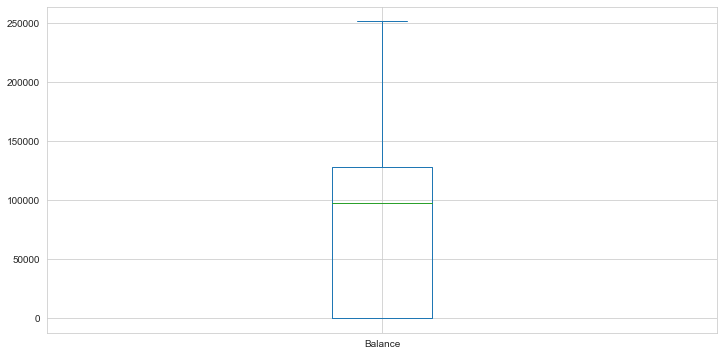

In [31]:
df.Balance.plot(kind="box")  # varlıklar bankadaki

In [32]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


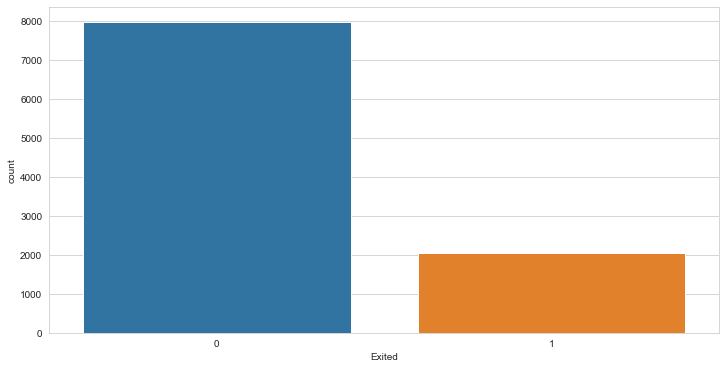

In [33]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

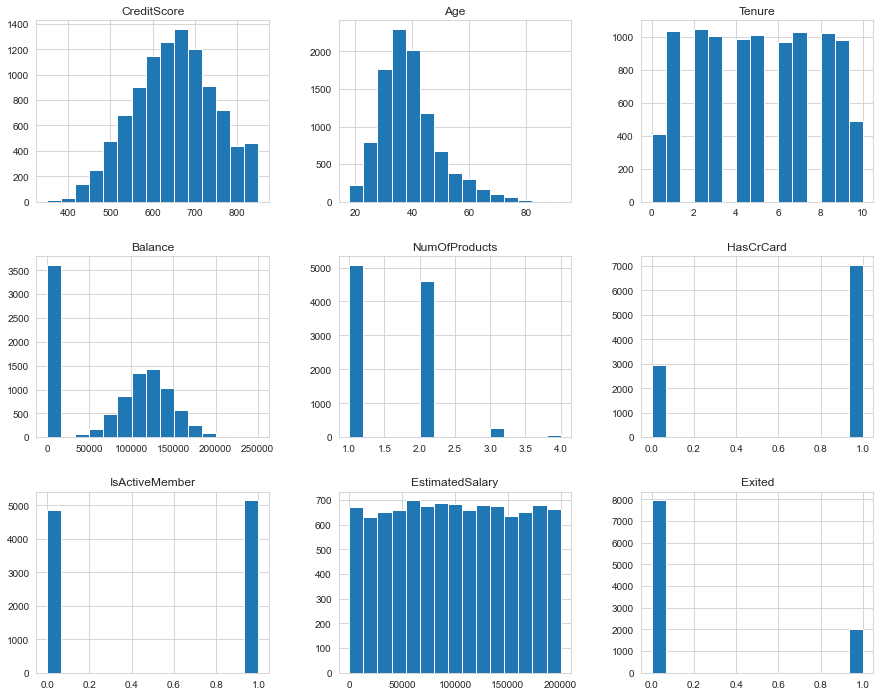

In [34]:
df.hist(figsize=(15, 12), bins=15);


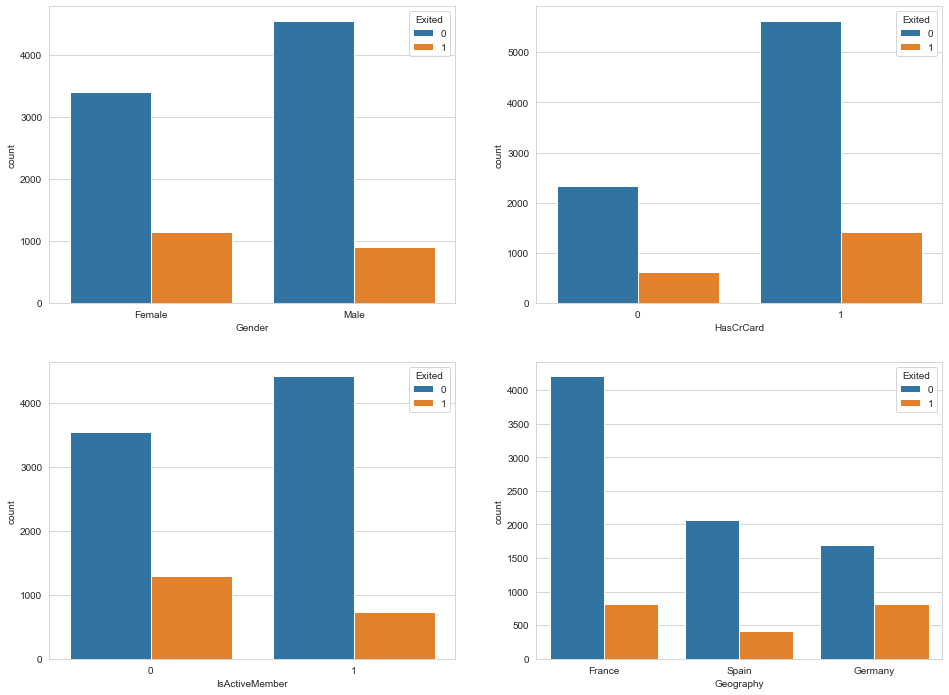

In [35]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

In [36]:
df.groupby("Age")["Exited"].value_counts()


Age  Exited
18   0         20
     1          2
19   0         26
     1          1
20   0         38
               ..
84   0          1
     1          1
85   0          1
88   0          1
92   0          2
Name: Exited, Length: 128, dtype: int64

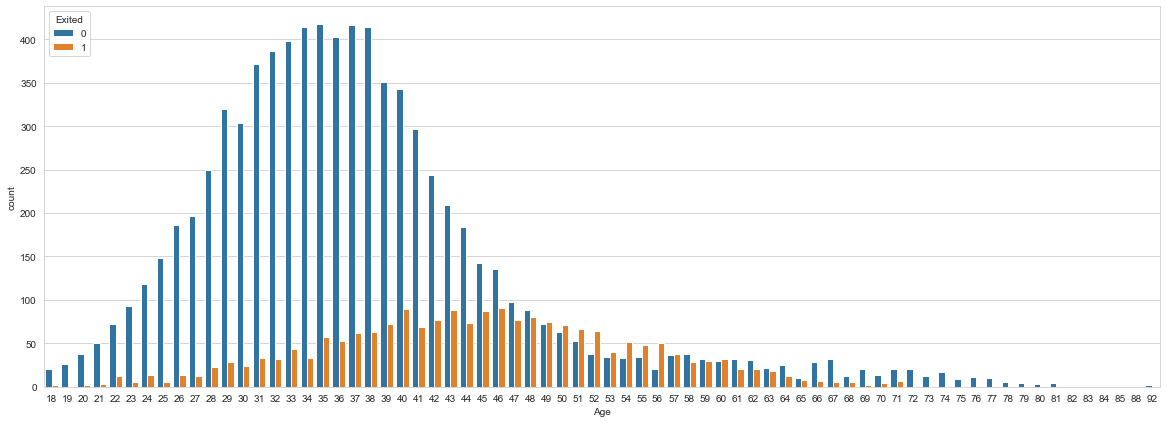

In [37]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

In [38]:
df.CreditScore.describe()

count   10000.000
mean      650.529
std        96.653
min       350.000
25%       584.000
50%       652.000
75%       718.000
max       850.000
Name: CreditScore, dtype: float64

In [39]:
def credit_transformer(x, y):
    if x < 350 and y == 0:
        return 0
    if x < 350 and y > 0:
        return 1
    if x < 718 and y == 0:
        return 2
    if x < 718 and y > 0:
        return 3
    else:
        return 4

In [40]:
customer_value = [
    credit_transformer(x, y) for x, y in zip(df.CreditScore, df.HasCrCard)
]
customer_value[:10]

[3, 2, 3, 2, 4, 3, 4, 3, 2, 3]

In [41]:
df.insert(10, "customer_value", customer_value)

In [42]:
df.customer_value

RowNumber
1        3
2        2
3        3
4        2
5        4
        ..
9996     4
9997     3
9998     2
9999     4
10000    4
Name: customer_value, Length: 10000, dtype: int64

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

result = encoder.fit_transform(df.customer_value.values.reshape(-1, 1))
print(result)


df.customer_value = result
df.customer_value

<AxesSubplot:>

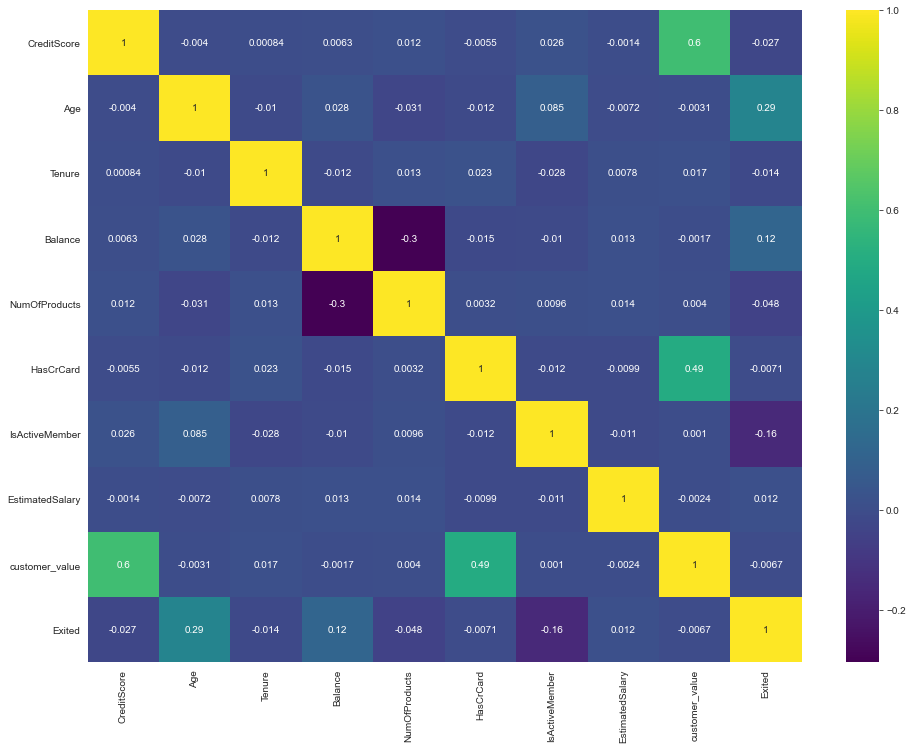

In [43]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

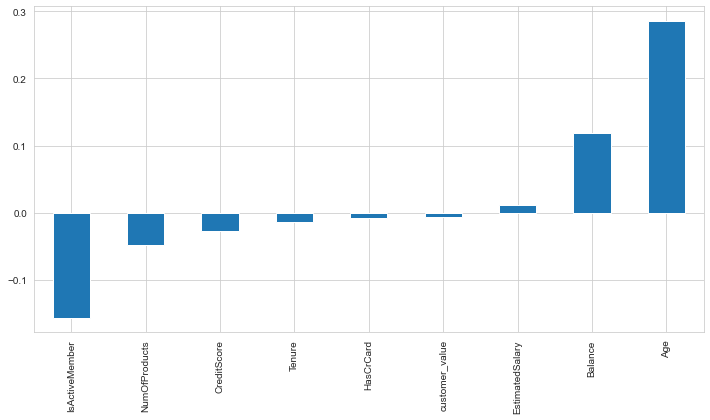

In [44]:
df.corr()['Exited'][:-1].sort_values().plot.bar()

In [45]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,customer_value,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,3,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,2,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,3,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,2,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,4,0,0,1,0


## Preprocessing of Data

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [47]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=42)


In [48]:
scaler = MinMaxScaler()


In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

<span class="mark">How many hidden layers should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)
How many hidden units should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)
What is genetic algorithm? : https://www.researchgate.net/post/What_is_genetic_algorithm1
Genetic algorithm + neural networks: http://francky.me/doc/mrf2011-HEC-ISIR-ENS_en.pdf (chapter 2.2)</span>

### without class_weigth

In [50]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])   # balancade accuracy olabilir.

<span class="burk">The patience is often set somewhere between 10 and 100 (10 or 20 is more common), but it really depends on your dataset and network.</span>

In [51]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [52]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1, # teste dokunmadık
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 1s 4ms/step - loss: 0.5012 - recall: 0.0000e+00 - val_loss: 0.4766 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4804 - recall: 0.0000e+00 - val_loss: 0.4630 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4713 - recall: 0.0000e+00 - val_loss: 0.4536 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4649 - recall: 0.0000e+00 - val_loss: 0.4474 - val_recall: 0.0000e+00
Epoch 5/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4590 - recall: 0.0188 - val_loss: 0.4391 - val_recall: 0.0829
Epoch 6/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4530 - recall: 0.0775 - val_loss: 0.4310 - val_recall: 0.1105
Epoch 7/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4465 - recall: 0.0969 - val_loss: 0.4228 - val_recall: 0.1215
Epoch 8/2

64/64 [==============================] - 0s 1ms/step - loss: 0.3554 - recall: 0.4207 - val_loss: 0.3112 - val_recall: 0.5193
Epoch 61/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3549 - recall: 0.4243 - val_loss: 0.3103 - val_recall: 0.5138
Epoch 62/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3546 - recall: 0.4304 - val_loss: 0.3111 - val_recall: 0.5138
Epoch 63/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3547 - recall: 0.4225 - val_loss: 0.3100 - val_recall: 0.5138
Epoch 64/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3536 - recall: 0.4268 - val_loss: 0.3103 - val_recall: 0.5304
Epoch 65/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3544 - recall: 0.4377 - val_loss: 0.3102 - val_recall: 0.5304
Epoch 66/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3543 - recall: 0.4231 - val_loss: 0.3083 - val_recall: 0.5304
Epoch 67/200
64/64 [===========================

64/64 [==============================] - 0s 1ms/step - loss: 0.3451 - recall: 0.4425 - val_loss: 0.3031 - val_recall: 0.5414
Epoch 00119: early stopping


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

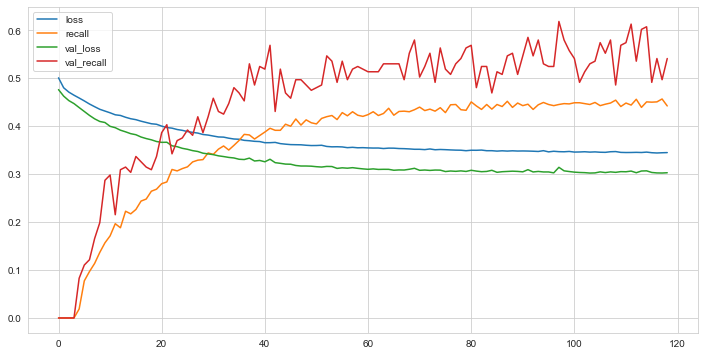

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [58]:
y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

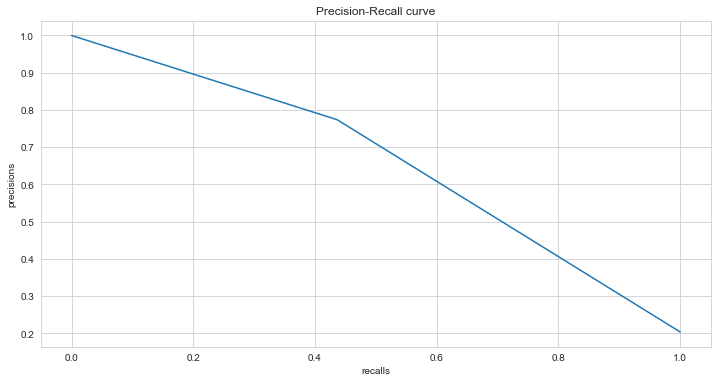

In [63]:
#y_pred_proba = model.predict_proba(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [65]:
average_precision_score(y_test, y_pred)

0.45263853367433926

### with class_weigth

In [66]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [67]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [69]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights
# 4 kat vermiş

{0: 0.6278777731268314, 1: 2.454991816693944}

In [74]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4739 - recall: 0.7585 - val_loss: 0.4122 - val_recall: 0.8011
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4751 - recall: 0.7530 - val_loss: 0.4642 - val_recall: 0.8287
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4734 - recall: 0.7603 - val_loss: 0.4307 - val_recall: 0.8066
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4730 - recall: 0.7615 - val_loss: 0.4570 - val_recall: 0.8232
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4711 - recall: 0.7694 - val_loss: 0.4360 - val_recall: 0.8287
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4719 - recall: 0.7561 - val_loss: 0.4191 - val_recall: 0.8066
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4697 - recall: 0.7694 - val_loss: 0.4937 - val_recall: 0.8398
Epoch 8/200
64/64 [======================

<AxesSubplot:>

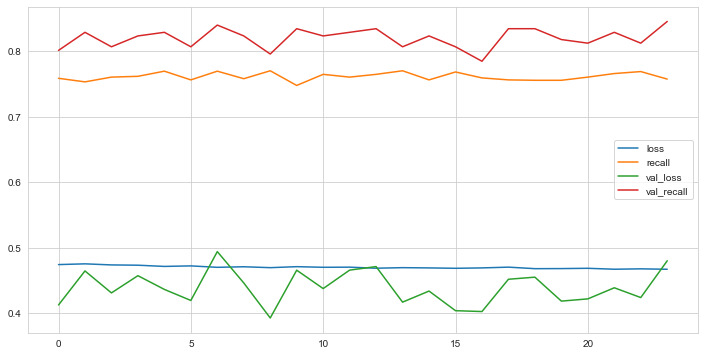

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [78]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

In [79]:
y_pred_proba = model.predict_proba(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [80]:
average_precision_score(y_test, y_pred)

NameError: name 'y_pred_proba' is not defined

## GridSearchCV

In [86]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [87]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer,
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [88]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [89]:
classifier = KerasClassifier(build_fn=build_classifier, epochs=150)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, 'rmsprop', "SGD", "adagrad", "adadelta"]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0).fit(X_train,
                                         y_train,
                                         class_weight=class_weights)# fit parametresi içine yazdık weight i

Epoch 1/150
36/36 [==============================] - 1s 1ms/step - loss: 0.6853 - recall: 0.1942 
Epoch 2/150
36/36 [==============================] - 0s 1ms/step - loss: 0.6728 - recall: 0.4495
Epoch 3/150
36/36 [==============================] - 0s 1ms/step - loss: 0.6623 - recall: 0.5161
Epoch 4/150
36/36 [==============================] - 0s 1ms/step - loss: 0.6521 - recall: 0.5396
Epoch 5/150
36/36 [==============================] - 0s 1ms/step - loss: 0.6427 - recall: 0.5887
Epoch 6/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6346 - recall: 0.6072
Epoch 7/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6270 - recall: 0.6181
Epoch 8/150
36/36 [==============================] - 0s 2ms/step - loss: 0.6197 - recall: 0.6410
Epoch 9/150
36/36 [==============================] - 0s 1ms/step - loss: 0.6138 - recall: 0.6481
Epoch 10/150
36/36 [==============================] - 0s 1ms/step - loss: 0.6091 - recall: 0.6579
Epoch 11/150
36/36 [========

36/36 [==============================] - 0s 1ms/step - loss: 0.4721 - recall: 0.7681
Epoch 85/150
36/36 [==============================] - 0s 1ms/step - loss: 0.4720 - recall: 0.7594
Epoch 86/150
36/36 [==============================] - 0s 2ms/step - loss: 0.4717 - recall: 0.7600
Epoch 87/150
36/36 [==============================] - 0s 1ms/step - loss: 0.4710 - recall: 0.7621
Epoch 88/150
36/36 [==============================] - 0s 1ms/step - loss: 0.4708 - recall: 0.7616
Epoch 89/150
36/36 [==============================] - 0s 1ms/step - loss: 0.4707 - recall: 0.7583
Epoch 90/150
36/36 [==============================] - 0s 1ms/step - loss: 0.4699 - recall: 0.7670
Epoch 91/150
36/36 [==============================] - 0s 1ms/step - loss: 0.4694 - recall: 0.7610
Epoch 92/150
36/36 [==============================] - 0s 1ms/step - loss: 0.4691 - recall: 0.7681
Epoch 93/150
36/36 [==============================] - 0s 1ms/step - loss: 0.4692 - recall: 0.7610
Epoch 94/150
36/36 [=============

In [90]:
grid_model.best_score_

0.7637478853503221

In [91]:
grid_model.best_params_

{'batch_size': 256, 'optimizer': 'rmsprop'}

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

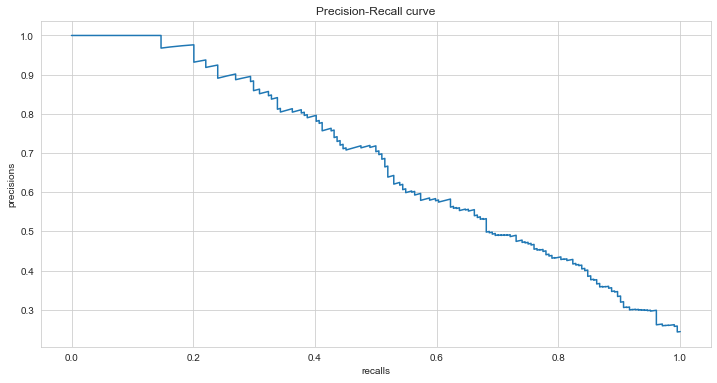

In [92]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [93]:
average_precision_score(y_test, y_pred_proba)

0.6762867870432943

## Final Model and Model Deployment

In [94]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [95]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 1s 4ms/step - loss: 0.6938 - recall: 0.4839 - val_loss: 0.6807 - val_recall: 0.6029
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6850 - recall: 0.4501 - val_loss: 0.6536 - val_recall: 0.4657
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6703 - recall: 0.4812 - val_loss: 0.6412 - val_recall: 0.5637
Epoch 4/200
71/71 [==============================] - 0s 1ms/step - loss: 0.6532 - recall: 0.5788 - val_loss: 0.6296 - val_recall: 0.6275
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6367 - recall: 0.6301 - val_loss: 0.6155 - val_recall: 0.6520
Epoch 6/200
71/71 [==============================] - 0s 1ms/step - loss: 0.6223 - recall: 0.6639 - val_loss: 0.6031 - val_recall: 0.6716
Epoch 7/200
71/71 [==============================] - 0s 1ms/step - loss: 0.6106 - recall: 0.6792 - val_loss: 0.5968 - val_recall: 0.6716
Epoch 8/200
71/71 [======================

71/71 [==============================] - 0s 1ms/step - loss: 0.4747 - recall: 0.7610 - val_loss: 0.4833 - val_recall: 0.7500
Epoch 61/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4746 - recall: 0.7583 - val_loss: 0.4887 - val_recall: 0.7451
Epoch 62/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4741 - recall: 0.7670 - val_loss: 0.5340 - val_recall: 0.7794
Epoch 63/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4737 - recall: 0.7578 - val_loss: 0.5006 - val_recall: 0.7745
Epoch 64/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4732 - recall: 0.7654 - val_loss: 0.4136 - val_recall: 0.6373
Epoch 65/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4737 - recall: 0.7572 - val_loss: 0.5142 - val_recall: 0.7745
Epoch 66/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4735 - recall: 0.7594 - val_loss: 0.5181 - val_recall: 0.7696
Epoch 67/200
71/71 [===========================

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_churn.h5')

### Prediction

In [ ]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

In [96]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 12))
single_customer#direk alamadım scale ettim resahape yaptım

NameError: name 'single_customer' is not defined

In [ ]:
model.predict_classes(single_customer)
# tahmin ettim

In [ ]:
df["Exited"].iloc[0]
# gerçek değerine baktım

---
---

## Comparison with ML

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
clf1 = RandomForestClassifier(random_state=42, class_weight="balanced")
clf2 = SVC(probability=True, random_state=42, class_weight="balanced")
#  daprobability
clf3 = LogisticRegression(random_state=42, class_weight="balanced")

In [ ]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**(-2+i) for i in range(5)]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**(-2+i) for i in range(5)]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

In [ ]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3]

In [ ]:
grid_model = GridSearchCV(pipeline, params, cv=5, n_jobs=-1,
                  scoring='recall').fit(X_train, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
grid_model.best_score_

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='RF')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

In [ ]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

---
---